#                                   WATER POTABILITY

# Data Collection/Gathering the data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [2]:
#loading the dataset
WQ=pd.read_csv("water_potability.csv")
WQ

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Data Preprocessing(EDA)

In [3]:
WQ.shape

(3276, 10)

In [4]:
#check for duplicate values
WQ[WQ.duplicated()].shape

(0, 10)

In [5]:
WQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
WQ.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
WQ.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


# a.Missing Value Handling

In [8]:
WQ.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Figure size 1008x576 with 0 Axes>

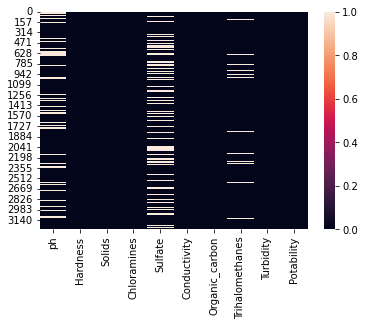

<Figure size 1008x576 with 0 Axes>

In [9]:
sns.heatmap(WQ.isnull())
plt.figure(figsize=(14,8))

In [10]:
WQ.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
#Treating the missing values with KNN imputation
from sklearn.impute import KNNImputer
imputer_knn=KNNImputer()

In [12]:
df=imputer_knn.fit_transform(WQ)

In [13]:
WQ=pd.DataFrame(df, columns=WQ.columns)
WQ

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,364.091541,392.449580,19.903225,64.327280,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,327.357588,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,325.952434,402.883113,11.168946,77.488213,4.708658,1.0


In [14]:
WQ.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
WQ.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.080383,-0.100512,-0.028970,0.027832,0.018234,0.035420,-0.002337,-0.032971,-0.002920
Hardness,0.080383,1.000000,-0.046899,-0.030054,-0.101627,-0.023915,0.003610,-0.014199,-0.014449,-0.013837
Solids,-0.100512,-0.046899,1.000000,-0.070148,-0.190596,0.013831,0.010242,-0.003769,0.019546,0.033743
Chloramines,-0.028970,-0.030054,-0.070148,1.000000,0.033203,-0.020486,-0.012653,0.014224,0.002363,0.023779
Sulfate,0.027832,-0.101627,-0.190596,0.033203,1.000000,-0.014102,0.027612,-0.024026,-0.012605,-0.022108
Conductivity,0.018234,-0.023915,0.013831,-0.020486,-0.014102,1.000000,0.020966,0.001564,0.005798,-0.008128
Organic_carbon,0.035420,0.003610,0.010242,-0.012653,0.027612,0.020966,1.000000,-0.012044,-0.027308,-0.030001
Trihalomethanes,-0.002337,-0.014199,-0.003769,0.014224,-0.024026,0.001564,-0.012044,1.000000,-0.024393,0.006918
Turbidity,-0.032971,-0.014449,0.019546,0.002363,-0.012605,0.005798,-0.027308,-0.024393,1.000000,0.001581
Potability,-0.002920,-0.013837,0.033743,0.023779,-0.022108,-0.008128,-0.030001,0.006918,0.001581,1.000000


<AxesSubplot:>

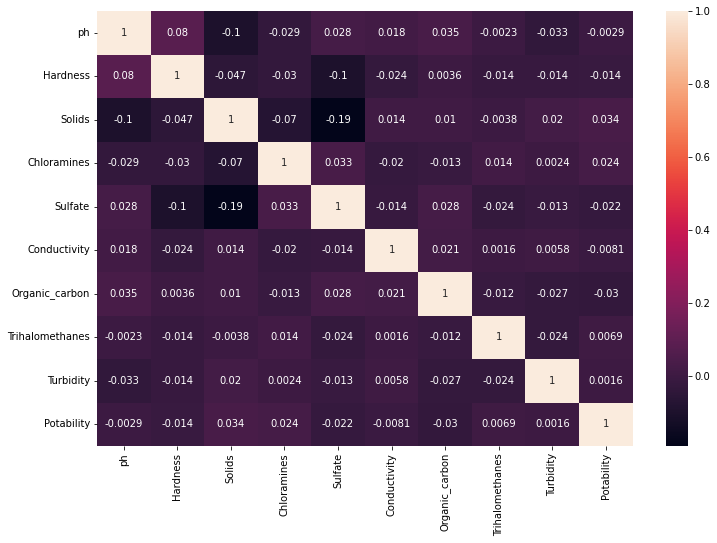

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(WQ.corr(),annot=True)

# b.Outlier Detection

In [17]:
WQ.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.078167,196.369496,22014.092526,7.122277,333.605767,426.205111,14.284970,66.403218,3.966786,0.390110
std,1.497228,32.879761,8768.570828,1.583085,37.453055,80.824064,3.308162,15.837754,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.187017,176.850538,15666.690297,6.127421,312.389295,365.734414,12.065801,56.409254,3.439711,0.000000
50%,7.052221,196.967627,20927.833607,7.130299,333.255192,421.884968,14.218338,66.603114,3.955028,0.000000
75%,7.948570,216.667456,27332.762127,8.114887,355.013586,481.792304,16.557652,76.843337,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


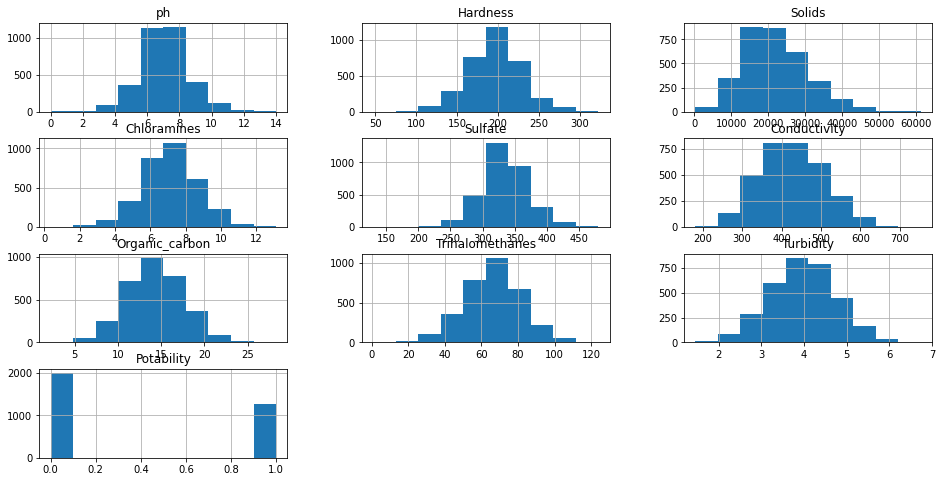

In [18]:
WQ.hist(figsize=(16,8))
plt.show()

In [19]:
#As my features are normally distributed,the presence of the outliers does not impact or affect my data.

In [20]:
WQ['Potability'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3271    1.0
3272    1.0
3273    1.0
3274    1.0
3275    1.0
Name: Potability, Length: 3276, dtype: float64>

In [21]:
WQ['Potability'].value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

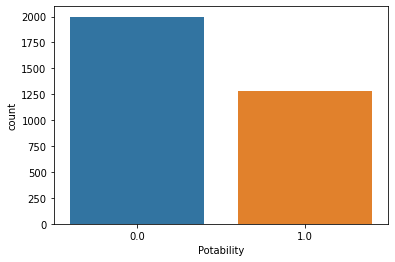

In [22]:
sns.countplot(WQ['Potability'])
plt.show()

<AxesSubplot:ylabel='Potability'>

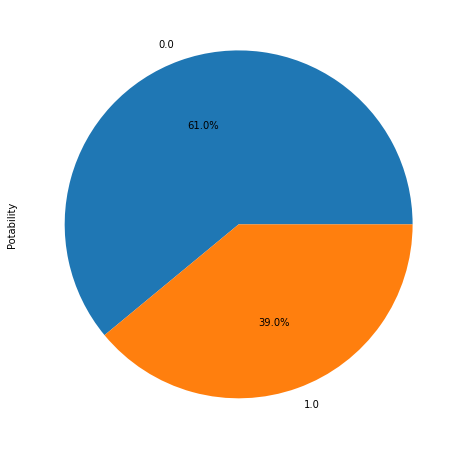

In [23]:
#Pie chart to show skew of potability
WQ["Potability"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8))

# Model Building

# Split dataset into features and target variable

In [24]:
#splitting input data with target variable
x = WQ.drop('Potability', axis=1)
y = WQ['Potability']

In [25]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x=scaled.fit_transform(x)

# Split dataset into train and test splits

In [26]:
from sklearn.model_selection import train_test_split
xr_train, x_test, yr_train, y_test = train_test_split(x,y, test_size=0.28,random_state=42)

In [27]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(xr_train, yr_train.ravel())

# Building model using Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [29]:
#Training the model
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
#Evaluating the model
ypred_train = dt.predict(x_train)
ypred_test = dt.predict(x_test)

In [31]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       571
         1.0       0.46      0.51      0.48       347

    accuracy                           0.58       918
   macro avg       0.57      0.57      0.57       918
weighted avg       0.59      0.58      0.59       918



In [32]:
accuracy_score(y_test,ypred_test)

0.5838779956427015

# Using Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [34]:
RF=RF.fit(x_train,y_train)
yp_test = RF.predict(x_test)

In [35]:
print(classification_report(y_test,yp_test))

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       571
         1.0       0.56      0.48      0.52       347

    accuracy                           0.66       918
   macro avg       0.63      0.63      0.63       918
weighted avg       0.65      0.66      0.66       918



In [36]:
accuracy_score(y_test,yp_test)

0.6612200435729847

# Using Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=1000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
ypr_train = LR.predict(x_train) 
ypr_test = LR.predict(x_test)

In [39]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,ypr_test))

              precision    recall  f1-score   support

         0.0       0.65      0.55      0.60       571
         1.0       0.41      0.50      0.45       347

    accuracy                           0.53       918
   macro avg       0.53      0.53      0.52       918
weighted avg       0.56      0.53      0.54       918



In [40]:
accuracy_score(y_test,ypr_test)

0.5337690631808278

# using KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=9)

In [42]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [43]:
ypre_test=Knn.predict(x_test)

In [44]:
print(classification_report(y_test,ypre_test))

              precision    recall  f1-score   support

         0.0       0.71      0.64      0.67       571
         1.0       0.49      0.57      0.53       347

    accuracy                           0.61       918
   macro avg       0.60      0.60      0.60       918
weighted avg       0.63      0.61      0.62       918



In [45]:
accuracy_score(y_test,ypre_test)

0.6132897603485838

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
ypred1_test=xgb.predict(x_test)

In [49]:
print(classification_report(y_test,ypred1_test))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       571
         1.0       0.53      0.52      0.53       347

    accuracy                           0.64       918
   macro avg       0.62      0.62      0.62       918
weighted avg       0.64      0.64      0.64       918



In [50]:
accuracy_score(y_test,ypred1_test)

0.6416122004357299

# Hyper Parameter Tuning

In [51]:
model_params = {
    'XGB':
    {
        'model':XGBClassifier(),
        'params':
        {
            'learning_rate':[0.001,0.01,0.1,0.5],
            'n_estimators':[10,50,100,200,500,1000],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    },
        
    'KNN':
    {
        'model':KNeighborsClassifier(),
        'params':
        {
            'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }
    }
}

In [52]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
scores_test=[]
best_parameters = []

for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20)
    rs.fit(x_train,y_train)
    rs_prediction = rs.predict(x_test)
    scores_test = accuracy_score(y_test, rs_prediction)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
    best_parameters.append([model_name, rs.best_params_])
    print('The TestAccuracy for {} is {}'.format(model_name, scores_test))
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

The TestAccuracy for XGB is 0.664488017429194
The TestAccuracy for Random Forest is 0.6633986928104575
The TestAccuracy for KNN is 0.6252723311546841


,Model,Parameters,Score
0,XGB,"{'n_estimators': 500, 'max_depth': 10, 'learni...",0.711287
1,Random Forest,"{'n_estimators': 200, 'max_features': 'log2', ...",0.688681
2,KNN,"{'weights': 'distance', 'n_neighbors': 5, 'met...",0.699193


In [53]:
best_parameters

[['XGB', {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1}],
 ['Random Forest',
  {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 10}],
 ['KNN', {'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean'}]]

In [54]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rs,pickle_out)
pickle_out.close()